In [ ]:
from operator import le
import pickle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()




In [ ]:
IRIS_data = pd.read_csv('/content/IRIS.csv')
IRIS_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
IRIS_data['species'], categories=pd.factorize(IRIS_data['species'])
IRIS_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
IRIS_data.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [ ]:
IRIS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
 5   cluster       150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [ ]:
IRIS_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Let's visualize the data


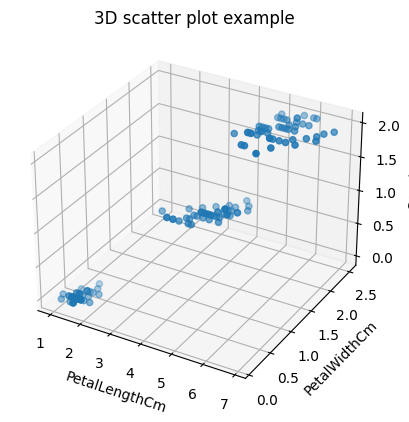

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(IRIS_data.petal_length, IRIS_data.petal_width, IRIS_data.species)
ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('Species')
plt.title('3D scatter plot example')
plt.show()

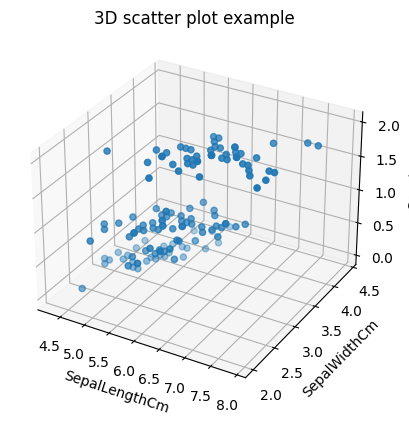

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(IRIS_data.sepal_length, IRIS_data.sepal_width, IRIS_data.species)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('Species')
plt.title('3D scatter plot example')
plt.show()

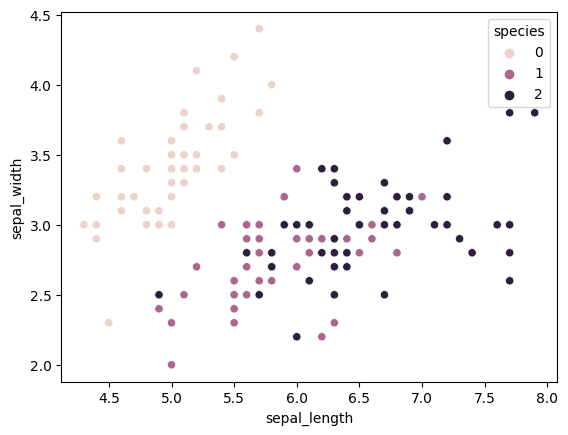

In [ ]:
#iris flower inclined towards the variables petal length and petal width
sns.scatterplot(data=IRIS_data, x="sepal_length", y="sepal_width", hue="species");

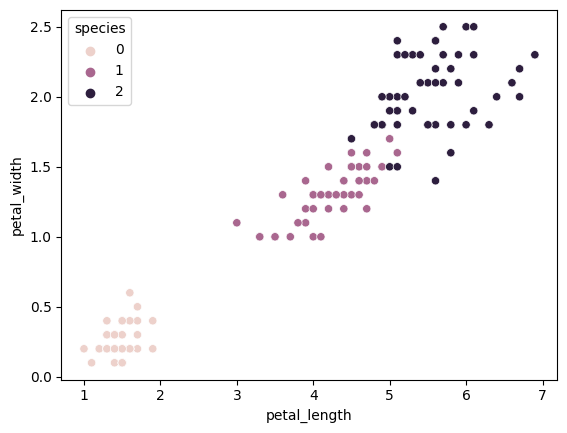

In [ ]:
sns.scatterplot(data=IRIS_data, x="petal_length", y="petal_width", hue="species");

In [ ]:
#elbow technique
k_rng= range(1,10)
sse=[]

for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(IRIS_data[["petal_length", "petal_width"]])
  sse.append(km.inertia_)

In [ ]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.499400899685114,
 13.999613141025636,
 11.103623662604786,
 9.274785438233266,
 7.631802244955954,
 6.530632636644402]

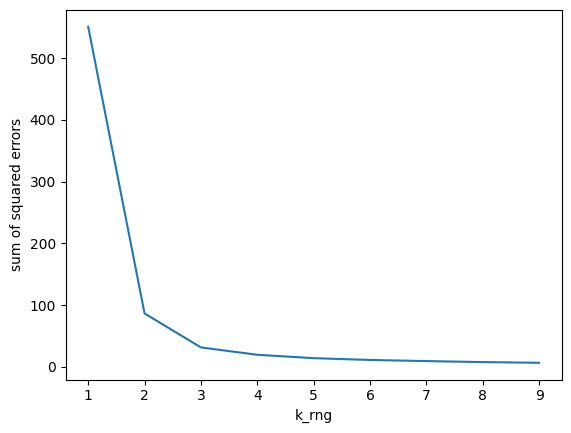

In [ ]:
plt.xlabel('k_rng')
plt.ylabel("sum of squared errors")
plt.plot(k_rng, sse)

In [ ]:
#lets do KMean Alogorithm
km = KMeans(n_clusters=3, random_state=0,)
y_predicted = km.fit_predict(IRIS_data[['petal_length', 'petal_width']])
y_predicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
IRIS_data['cluster']= y_predicted
IRIS_data.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


In [ ]:
#accuracy measure
cm= confusion_matrix(IRIS_data.species, IRIS_data.cluster)
cm

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 46,  4]])

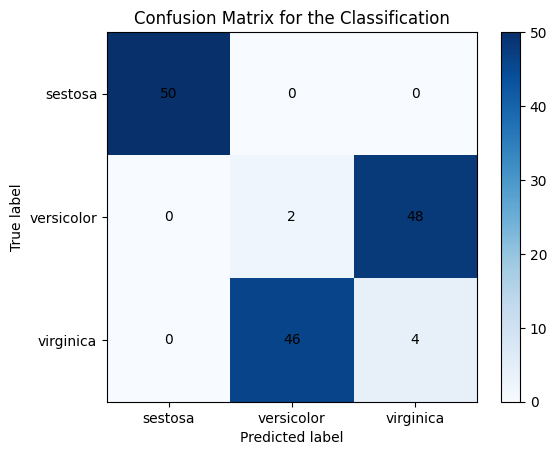

In [ ]:
true_labels= IRIS_data.species
predicted_labels= IRIS_data.cluster

cm= confusion_matrix(true_labels, predicted_labels)
class_labels=  ['sestosa', 'versicolor', 'virginica']

#plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Classification')
plt.colorbar()
tick_marks= np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

#fill matrix with values
for i in range (len(class_labels)):
  for j in range (len(class_labels)):
    plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='black')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()